Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

## I. Wrangle Data

In [ ]:
def wrangle(filepath):
    # Read in data / create index for dataframe
    df = pd.read_csv(filepath,parse_dates=['created'],index_col=['created'])

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    # Create numeric values to represent the level of interest
    df.loc[df['interest_level'] == 'low', 'interest_value'] = 1
    df.loc[df['interest_level'] == 'medium', 'interest_value'] = 2
    df.loc[df['interest_level'] == 'high', 'interest_value'] = 3

    # Cleaning the interest_value to be int
    df['interest_value'] = df['interest_value'].astype(int)

    # Clean the dataframe for columns that might be unneccary for the model
    columns_drop = ['display_address','street_address','description','interest_level']
    df.drop(columns=columns_drop,inplace=True)

    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
# Using the wrangle function above to import / clean data then re-assign the dataframe to df
df = wrangle(filepath)

In [ ]:
df

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,interest_value
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,40.7145,-73.9425,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2016-06-12 12:19:27,1.0,2,40.7947,-73.9667,5465,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-04-17 03:26:41,1.0,1,40.7388,-74.0018,2850,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2016-04-18 02:22:02,1.0,1,40.7539,-73.9677,3275,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-04-28 01:32:41,1.0,4,40.8241,-73.9493,3350,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-02 05:41:05,1.0,2,40.7426,-73.9790,3200,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2016-04-04 18:22:34,1.0,1,40.7102,-74.0163,3950,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
2016-04-16 02:13:40,1.0,1,40.7601,-73.9900,2595,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Calculate the % of Nul values if any
print('Percentage of null values within dataset: ')
print('-----------------------------------------')
((df.isnull()).sum()*100/(len(df))).round(2)

Percentage of null values within dataset: 
-----------------------------------------


bathrooms               0.0
bedrooms                0.0
latitude                0.0
longitude               0.0
price                   0.0
elevator                0.0
cats_allowed            0.0
hardwood_floors         0.0
dogs_allowed            0.0
doorman                 0.0
dishwasher              0.0
no_fee                  0.0
laundry_in_building     0.0
fitness_center          0.0
pre-war                 0.0
laundry_in_unit         0.0
roof_deck               0.0
outdoor_space           0.0
dining_room             0.0
high_speed_internet     0.0
balcony                 0.0
swimming_pool           0.0
new_construction        0.0
terrace                 0.0
exclusive               0.0
loft                    0.0
garden_patio            0.0
wheelchair_access       0.0
common_outdoor_space    0.0
interest_value          0.0
dtype: float64

In [ ]:
# Describe to see details of the dataset
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,interest_value
count,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000
mean,1.201794,1.537149,40.750760,-73.972760,3579.585247,0.524838,0.478276,0.478276,0.447631,0.424852,0.415081,0.367085,0.052769,0.268452,0.185653,0.175902,0.132761,0.138394,0.102833,0.087203,0.060471,0.055206,0.051908,0.046193,0.043305,0.042711,0.039331,0.027224,0.026241,1.380216
std,0.470711,1.106087,0.038954,0.028883,1762.430772,0.499388,0.499533,0.499533,0.497255,0.494326,0.492741,0.482015,0.223573,0.443158,0.388830,0.380741,0.339320,0.345317,0.303744,0.282136,0.238359,0.228385,0.221844,0.209905,0.203544,0.202206,0.194382,0.162738,0.159852,0.621962
min,0.000000,0.000000,40.575700,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

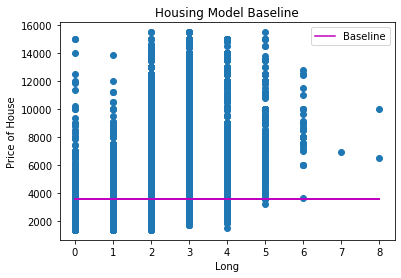

In [ ]:
# Plot the predicted data to show visualization of the baseline
plt.plot(X,y_pred,label='Baseline',color='m')

# Create a scatter plot to plot all points
plt.scatter(X,y)

# Create Title for graph
plt.title('Housing Model Baseline')

# Create labels for data, and create legend
plt.xlabel('Long')
plt.ylabel('Price of House')
plt.legend()

# Show plot
plt.show();

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your feature matrix must be one-dimensional.

In [ ]:
# Assign the features matrix to the X variable
X=df[['bedrooms']]

# Assign the target vector
y=df['price']

# Find the predicted value of y, then assign it as a constant value
y_pred = [y.mean()]*len(y)

# Calculate the mean absolute error for y
mae = mean_absolute_error(y,y_pred)

# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
# Print the calculated value the mean of rent price
print('Mean of Rent Price: ',y.mean())
print('-----------------------------------------------------------------------')
# Print the calculated value the mean of absolute error
print('Mean of absolute error for baseline is: ',mae)

Mean of Rent Price:  3579.5852469426636
-----------------------------------------------------------------------
Mean of absolute error for baseline is:  1201.532252154329


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [ ]:
# Instantiate the predicator
model_lr = LinearRegression()

# Fit our model
model_lr.fit(X,y)

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [ ]:
# Assign the y predicted model with linear regression included
y_pred_lr = model_lr.predict(X)

In [ ]:
# Calculate the mae for our linear regression model
print('The mae for our baseline method is: ', mean_absolute_error(y,y_pred_lr))

The MAE for our baseline method is:  975.6496767374764


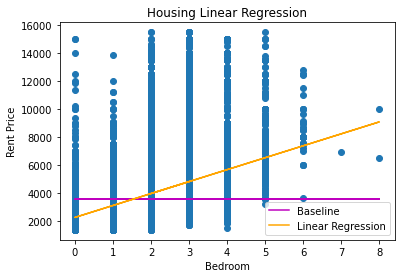

In [ ]:
# Plot the predicted data to show visualization of the baseline
plt.plot(X,y_pred,label='Baseline',color='m')

# Create a scatter plot to plot all points
plt.scatter(X,y)
plt.plot(X,y_pred_lr,label = 'Linear Regression',color = 'orange')

# Create Title for graph
plt.title('Housing Linear Regression')

# Create labels for data, and create legend
plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.legend()

# Show plot
plt.show();

In [ ]:
# Assign the intercept and coef
intercept = model_lr.intercept_
coef = model_lr.coef_[0]

# Print the results
print('Intercept: ',intercept)
print('-----------------------------------------------------------------------')
print('Coef: ',coef)

Intercept:  2267.987688178934
-----------------------------------------------------------------------
Coef:  853.266408483175


# VI. Communicate Results 

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using? 

**Task 7:** Print out the intercept and coefficient associated with `model`.

In [ ]:
# Print the results of the research
print(f'Rent Price = {intercept}+{coef}*Bedrooms')

Rent Price = 2267.987688178934+853.266408483175*Bedrooms


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
print('The training and testing feature: ', X_train.shape, y_train.shape)
print('The training and testing target: ', X_test.shape, y_test.shape)

The training and testing feature:  (39053, 1) (39053,)
The training and testing target:  (9764, 1) (9764,)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

coef = model.coef_[0]
intercept = model.intercept_

In [ ]:
print(model.coef_)

print(model.intercept_)

[851.17020508]
2268.0132790761663


In [ ]:
# Print the results of the research
print(f'Rent Price = {intercept}+{coef}*Bedrooms')

Rent Price = 2268.0132790761663+851.1702050773448*Bedrooms


In [ ]:
y_pred = model.predict(X_test)

r2_score(y_test,y_pred)

0.28844594929813816

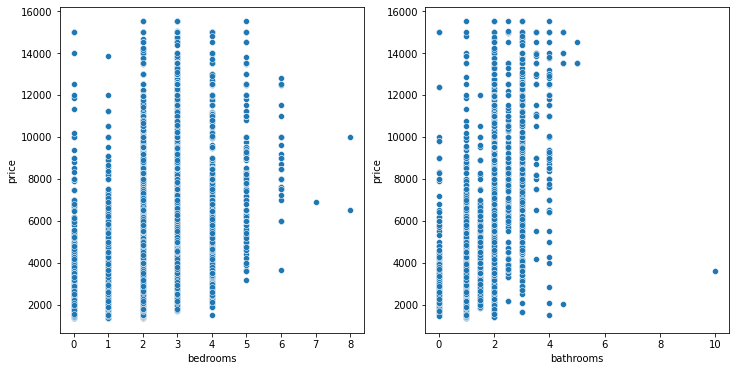

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(x="bedrooms",y="price",data=df,ax=ax1)
sns.scatterplot(x="bathrooms",y="price",data=df,ax=ax2)
plt.show();

In [ ]:
features = ['bedrooms','bathrooms']

X = df[features]

In [ ]:
model = LinearRegression()

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.coef_)
print(model.intercept_)

[ 385.09960579 2099.11215619]
464.9284409554898


In [ ]:
# Label the variables
x_bedroom = df['bedrooms']
y_bathroom = df['bathrooms']
z_rent = df['price']

# Create the data to plot the best-fit plane
(x_plane, y_plane) = np.meshgrid(np.arange(165,235,1),np.arange(30,60,1))
z_plane = 465 + 385*x_plane + 2099*y_plane

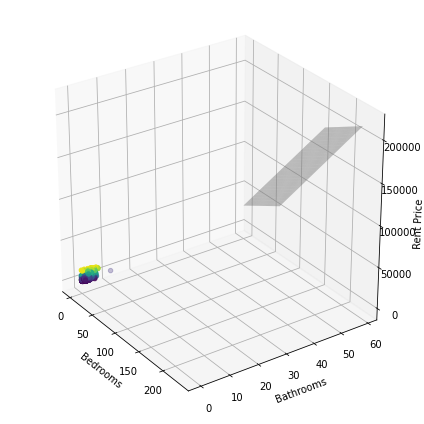

In [ ]:
# Inital the figure and axes objects
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# plot the data: 2 features, 1 target
ax.scatter(xs=x_bedroom,ys=y_bathroom,zs=z_rent,zdir='z',
           s=20, c=z_rent, cmap=cm.viridis)

# Plot the best-fit plane
ax.plot_surface(x_plane,y_plane,z_plane, color='gray', alpha=.5)

# General figure/axes properties
ax.view_init(elev=28, azim=325)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Rent Price')
fig.tight_layout()

plt.show();

In [ ]:
df.corr()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,interest_value
bathrooms,1.000000,0.524082,0.013407,-0.020099,0.687296,0.132882,0.021475,0.096922,0.024539,0.157173,0.172230,0.129547,-0.013202,0.148334,-0.016214,0.209366,0.102113,0.144450,0.233038,0.089073,0.136990,0.113315,0.066826,0.140767,-0.001944,0.014260,0.096283,0.066940,-0.003403,-0.072246
bedrooms,0.524082,1.000000,0.003490,0.055117,0.535503,-0.024821,-0.011173,0.096420,-0.009750,-0.047562,0.152102,0.163000,0.008558,0.013150,0.001420,0.151790,0.045451,0.124912,0.189415,0.061006,0.097772,0.033441,0.000907,0.099149,-0.014880,-0.107341,0.070760,0.012306,0.003234,0.040735
latitude,0.013407,0.003490,1.000000,0.329185,-0.036286,-0.010523,-0.029808,0.018653,-0.030954,-0.043393,-0.020612,-0.026788,-0.041635,-0.108455,0.026802,-0.044339,-0.063198,-0.079919,0.017146,-0.030969,0.016877,0.027020,-0.056093,0.006466,-0.060054,-0.015650,-0.000589,-0.068330,-0.117199,-0.046203
longitude,-0.020099,0.055117,0.329185,1.000000,-0.251004,-0.189836,-0.058475,-0.108493,-0.070329,-0.275734,-0.169220,-0.088033,-0.044562,-0.254960,0.000196,-0.130139,-0.161466,-0.098595,-0.024793,-0.125635,-0.035474,-0.075046,-0.108001,-0.049016,0.046755,-0.060018,-0.029846,-0.063635,-0.102955,0.059222
price,0.687296,0.535503,-0.036286,-0.251004,1.000000,0.207169,0.051453,0.101503,0.060401,0.276215,0.223899,0.132240,-0.019417,0.228775,-0.029122,0.271195,0.122929,0.142146,0.242911,0.090269,0.139140,0.134513,0.071431,0.145973,-0.013251,0.007100,0.103672,0.072517,0.011517,-0.203596
elevator,0.132882,-0.024821,-0.010523,-0.189836,0.207169,1.000000,0.033347,0.270831,0.034833,0.614558,0.349832,0.227895,0.141097,0.431070,-0.097015,0.134158,0.332028,0.204343,0.200591,0.277666,0.168081,0.183664,0.184178,0.135329,0.025895,0.054918,0.084056,0.155396,0.114882,-0.008542
cats_allowed,0.021475,-0.011173,-0.029808,-0.058475,0.051453,0.033347,1.000000,-0.177633,0.937245,0.088480,-0.047880,-0.024052,0.105644,0.126886,0.047500,-0.008827,0.027590,0.066713,-0.022404,0.077759,0.019979,0.009704,0.042710,0.006152,0.031414,-0.037966,0.006690,0.039656,0.104496,-0.057777
hardwood_floors,0.096922,0.096420,0.018653,-0.108493,0.101503,0.270831,-0.177633,1.000000,-0.185663,0.205119,0.634983,0.342971,-0.144728,0.167510,0.013435,0.360716,0.278727,0.188913,0.317281,0.237935,0.178089,0.170589,0.187635,0.181005,-0.194436,0.116572,0.161751,0.124829,-0.120489,0.118992
dogs_allowed,0.024539,-0.009750,-0.030954,-0.070329,0.060401,0.034833,0.937245,-0.185663,1.000000,0.095434,-0.043839,-0.011414,0.093035,0.131521,0.051610,0.002510,0.034104,0.067859,-0.016154,0.089425,0.024472,0.009675,0.055655,0.005219,0.032729,-0.041014,0.009229,0.048123,0.106071,-0.064214
doorman,0.157173,-0.047562,-0.043393,-0.275734,0.276215,0.614558,0.088480,0.205119,0.095434,1.000000,0.312710,0.257031,0.077216,0.604863,-0.054614,0.166397,0.388921,0.205656,0.195814,0.312036,0.160789,0.263833,0.219943,0.126936,-0.074747,0.010080,0.075956,0.168161,0.126708,-0.078467


In [ ]:
def least_squares_params(x, y):
    '''
    x and y: data to be fit
    returns: the least-square values of alpha and beta
    '''
    # Calculate the mean of X and y
    xmean = np.mean(x); ymean = np.mean(y)

    # Calculate the covariance for x and y, variance for x
    xycov = (x-xmean)*(y-ymean)
    xvar = (x-xmean)**2

    # Calculate the coefficients
    beta_1 = sum(xycov) / sum(xvar)
    beta_0 = ymean - (beta_1*xmean)

    print('beta_0: ', beta_0)
    print('beta_1: ', beta_1)